## CRISP-DM (https://www.datascience-pm.com/crisp-dm-2/)

- 1. Business Understanding
- 2. Data Understanding
- 3. Data Preparation
- 4. Modeling
- 5. Evaluation
- 6. Deployment

### 1. Business Understanding - Jonnas

- 1.1. Determine business objectives
- 1.2. Assess situation
- 1.3. Determine data mining goals
- 1.4. Produce project plan

Isto deve ser so teorico

### 2. Data Understanding - Vicente

- 2.1. Collect initial data - ler os dados todos
- 2.2. Describe data - examinar os dados e descreve-los, as suas propriedades, numero de ocorrencia, etc.
- 2.3. Explore data - explorar os dados, visualizalos, ver padroes, etc.
- 2.4. Verify data quality - verificar a integridade dos dados, ver se tem erros, inconsistencias, etc.

In [33]:
import csv                              #-----------------------------#
import random                           #    READING THE DATASET      #
import numpy as np                      #-----------------------------#
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


def read_and_truncate_dataset(file_path_1="dataset.csv", file_path_2="./FinalProject/dataset.csv", percentagem_da_dataset_a_usar=100):
    """
    Retorna um numpy array de arrays com o dataset da mesma forma que está no csv. Retorna também um panda dataframe

    Controla a quantidade de dados a usar da dataset original com percentagem_da_dataset_a_usar. 3.24 ~= 10000 linhas do csv original
    """
    try:
        with open(file_path_1, mode='r') as file:
            csvFile = csv.reader(file)
            categorias = next(csvFile)
        dadosC = pd.read_csv(file_path_1)
    except FileNotFoundError:
        with open(file_path_2, mode='r') as file:
            csvFile = csv.reader(file)
            categorias = next(csvFile)
        dadosC = pd.read_csv(file_path_2)
    
    # Truncate dataset
    num_rows_to_use = int(len(dadosC) * (percentagem_da_dataset_a_usar / 100))
    truncated_dadosC = dadosC.head(num_rows_to_use)

    # Convert to NumPy array
    numpy_array = truncated_dadosC.to_numpy()

    # Return both NumPy array, Pandas DataFrame, and column names
    return numpy_array, truncated_dadosC, categorias

numpy_arrays_dataset, pandas_frame_dataset, categorias = read_and_truncate_dataset(percentagem_da_dataset_a_usar=3) # para testes e desenvolvimento

numpy_arrays_dataset_transposed = numpy_arrays_dataset.T

In [34]:
def exemplos_dataset():
	"""
	Mostra como o dataset está formatado
	"""
	# exemplos do dataset
	for i in range(len(categorias)):
		print("Categoria "+str(categorias[i])+":")
		print(numpy_arrays_dataset_transposed[i,0:5],end="\n\n")

	# tipos de diferentes respostas a cada categoria
	for i in range(len(categorias)):
		print("Tipos de respostas para a categoria "+str(categorias[i])+":")
		print(np.unique(numpy_arrays_dataset_transposed[i]),end="\n\n")

def graficos_gerais(categorias=categorias):
	"""
	Devolve graficos para visualisar melhor o dataset

	Devolve os graficos de todos as categorias por default mas pode escolher uma cagetoria em especifico para mostrar

	graficos_gerais(['Exercise','Checkup'])
	graficos_gerais()
	"""
	print("categorias escolhidas: "+str(categorias))
	for i in categorias:
		contar = Counter(pandas_frame_dataset.T.loc[i])

		print(sorted(contar.keys()))
		print(contar.values())

		plt.title("Respostas sobre a categoria "+str(i))
		plt.pie(contar.values(),labels=contar.keys(),autopct='%1.1f%%')
		plt.show()

def graficos_especificos():
	"""
	Devolve graficos de categorias especificas mais relevantes para o problema
	"""
	# pessoas que dizem que n fazem exercicio -> +% na parte de doencas
	indices = []
	for i in range(len(numpy_arrays_dataset_transposed[2])):
		#3 4 5 6 7 8
		if numpy_arrays_dataset_transposed[2][i] == "No":
			indices.append(i)

	for i in range(3,9):
		unicos = np.unique(numpy_arrays_dataset_transposed[i])
		valores = [str(numpy_arrays_dataset_transposed[i][j]) for j in indices]
		valores = np.array(valores)
		valores2 = [np.count_nonzero(valores==x) for x in unicos]

		print(unicos)
		print(valores2)
		
		plt.title("Respostas para pessoas que nao fazem exercicio para a categoria "+str(categorias[i]))
		plt.pie(valores2,labels=unicos,autopct='%1.1f%%')
		plt.show()
	
	# ver que respostas deram as pessoas que tem problemas cardiacos
	indices = []
	for i in range(len(numpy_arrays_dataset_transposed[3])):
		if numpy_arrays_dataset_transposed[3][i] == "Yes":
			indices.append(i)

	for i in range(len(categorias)):
		unicos = np.unique(numpy_arrays_dataset_transposed[i])
		valores = [str(numpy_arrays_dataset_transposed[i][j]) for j in indices]
		valores = np.array(valores)
		valores2 = [np.count_nonzero(valores==x) for x in unicos]

		print(unicos)
		print(valores2)
		
		plt.title("Respostas para pessoas que têm doenças cardiacas para a categoria "+str(categorias[i]))
		plt.pie(valores2,labels=unicos,autopct='%1.1f%%')
		plt.show()

# 2.4.
def inconsistencias():
	"""
	Mostra algumas consisntecias e inconsistencias nos dados
	"""
	# falar da inconsistencia das batatas fritas / alcool / fruta / vegetais
	# vou usar quantas vezes por mes come/bete a categoria

	# mostrar que nao tem valores em falta
	for i in numpy_arrays_dataset_transposed:
		print(len(i))
	print(len(numpy_arrays_dataset_transposed.T))

### 3. Data Preparation

- 3.1. Select data - Determine which data sets will be used and document reasons for inclusion/exclusion.
- 3.2. Clean data - Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.
- 3.3. Construct data - Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.
- 3.4. Integrate data - Create new data sets by combining data from multiple sources.
- 3.5. Format data - Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.

Esta parte vai ser para a parte de alterar o dataset que o stor disse, depois temos de incluir estes topicos talvez

###### - Randomly remove 10% and 20% of the values of the features the dataset and explore two different strategies to handle missing values;
###### - Experiment with data normalization, data discretization, and data reduction. Apply these steps to the original, unchanged, dataset.

#### Strategies to handle missing values

Para poder testar vários métodos para lidar com "missing values", temos primeiro que gerar uma database com missing values, para simular isto, a função a baixo remove aleatoreamente uma percentagem de datapoints da dataset e substitui por None, ficando da forma do seguinte exemplo:

| Health | Checkup           | Exer | HD | SC | OC | D | Di | A | Sex    | Age | cm | kg | BMI   | SH | AC | FC | GVC | FPC |
|-----------------|-------------------------|----------|---------------|-------------|--------------|------------|----------|-----------|--------|--------------|-------------|-------------|-------|-----------------|---------------------|-------------------|-----------------------------|-------------------------|
| Poor           | Within the past 2 years | No       | None          | No          | No           | No         | No       | Yes       | None   | 70-74        | None        | 32.66       | None  | Yes             | 0.0                 | 30.0             | None                       | 12.0                   |
| None           | Within the past year    | None     | Yes           | No          | None         | No         | Yes      | None      | Female | None         | 165.0       | None        | 28.29 | No              | 0.0                 | 30.0             | 0.0                        | None                   |
| Very Good      | Within the past year    | Yes      | None          | No          | None         | No         | None     | No        | Female | 60-64        | 163.0       | 88.45       | None  | No              | 4.0                 | None             | 3.0                        | None                   |
| Poor           | None                    | Yes      | Yes           | None        | No           | No         | Yes      | None      | Male   | 75-79        | None        | None        | 28.73 | No              | None                | 30.0             | 30.0                       | 8.0                    |


In [35]:
def damage_dataset(percentage, dataset):
	"""
    Remove x percentagem dos dados do dataset
	"""
	dataset = dataset.to_numpy()
	tamanho = dataset.size

	for i in range(int(tamanho*percentage)):
		dataset[random.randint(0,len(dataset)-1)][random.randint(0,len(dataset[0])-1)] = None # elemento random mete para None

	return pd.DataFrame(dataset)


In [36]:
def troca_pelo_mais_frequente(dataset):
	"""  
	Pega no dataset com Nones e substitui-os pelo valor mais frequente da categoria
	"""
	dataset = dataset.to_numpy()
	dataset = dataset.T

	# guarda o elemtno mais frequente de todas as categorias
	mais_frequente = []
	for i in range(len(dataset)):
		conta = Counter(dataset[i])
		del conta[None]
		mais_frequente.append(conta.most_common(1))

	# substitiu tocas as ocorrencias de None pelo mais frequente da categoria
	for i in range(len(dataset)):
		for j in range(len(dataset[i])):
			if dataset[i][j] == None:
				dataset[i][j] = mais_frequente[i][0][0]

	return pd.DataFrame(dataset.T)

def remove_lines_with_missing_values(dataset):
    if isinstance(dataset, np.ndarray):
        dataset = pd.DataFrame(dataset)
    elif not isinstance(dataset, pd.DataFrame):
        raise ValueError("Input dataset must be either a pandas DataFrame or a NumPy array.")

    initial_rows = len(dataset)
    cleaned_dataset = dataset.dropna()
    final_rows = len(cleaned_dataset)
    removed_percentage = ((initial_rows - final_rows) / initial_rows) * 100

    print(f"[REMOVE_LINES_WITH_MISSING_VALUES]: Percentage of rows removed: {removed_percentage:.2f}%")
    return cleaned_dataset

def fill_missing_values_with_mean_and_mode(dataset):
    """
    Usa a média para preencher valores númericos em falta
    Usa a moda para preencher valores categoricos em falta
    """
    if isinstance(dataset, np.ndarray):
        dataset = pd.DataFrame(dataset)
    elif not isinstance(dataset, pd.DataFrame):
        raise ValueError("Input dataset must be either a pandas DataFrame or a NumPy array.")

    for column in dataset.columns:
        if dataset[column].dtype in ['float64', 'int64']:  # valores numericos
            mean_value = dataset[column].mean()
            dataset[column].fillna(mean_value, inplace=True)
        else:  # valores categoricos
            mode_value = dataset[column].mode()[0]
            dataset[column].fillna(mode_value, inplace=True)

    return dataset

In [37]:
dataset_for_tests = pandas_frame_dataset.copy() # copia, para deixar a original intacta
damaged_dataset = damage_dataset(0.2,dataset_for_tests) # Substitui 20% dos datapoints por None

# Method 0 (Jonnas)
removed_lines_with_missing_values_dataset = remove_lines_with_missing_values(damaged_dataset.copy())

# Method 1 (Vicente) 
mais_freq = troca_pelo_mais_frequente(damaged_dataset.copy())

# Method 2 (Jonnas)
mean_and_mode_missing_values_dataset = fill_missing_values_with_mean_and_mode(damaged_dataset.copy()) # em valores categoricos usa a moda, em numericos usa o mean

print('dataset_for_tests')
print(dataset_for_tests)
print('damage_dataset')
print(damaged_dataset)
print('Metodo 0: removed_lines_with_missing_values_dataset')
print(removed_lines_with_missing_values_dataset)
print("Metodo 1: troca_pelo_mais_frequente")
print(mais_freq)
print('Metodo 2: mean_and_mode_missing_values_dataset')
print(mean_and_mode_missing_values_dataset)

[REMOVE_LINES_WITH_MISSING_VALUES]: Percentage of rows removed: 97.93%
dataset_for_tests
     General_Health                  Checkup Exercise Heart_Disease  \
0              Poor  Within the past 2 years       No            No   
1         Very Good     Within the past year       No           Yes   
2         Very Good     Within the past year      Yes            No   
3              Poor     Within the past year      Yes           Yes   
4              Good     Within the past year       No            No   
...             ...                      ...      ...           ...   
9260      Very Good     Within the past year      Yes            No   
9261           Good     Within the past year      Yes           Yes   
9262      Excellent  Within the past 5 years      Yes            No   
9263      Very Good     Within the past year      Yes            No   
9264           Good      5 or more years ago      Yes            No   

     Skin_Cancer Other_Cancer Depression Diabetes Arthriti

/tmp/ipykernel_1012283/548163730.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(mode_value, inplace=True)
/tmp/ipykernel_1012283/548163730.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[column].fillna(mode_value, inplace=True)


#### Mudanças ao Dataset (Data reduction, Normalization, Discretization)

In [38]:
def preprocess_dataset(dataset, debug=False):
    """
    Transforma todos os features não numericos num número com LabelEncoder, para os modelos scikit-learn poderem interpretar.

    Retorna uma matriz "features" com todos os dados menos os da da "Heart_Disease" e "target", apenas com a matriz "Heart_Disease" já codificada com a Label (portanto, com 0s e 1s em vez de Yes e No)
    """

    # Como os modelos de machine learning do scikit-learn não conseguem lidar com dados categóricos, aqui codificamo-los em dados numéricos
    label_encoders = {}
    for column in dataset.select_dtypes(include=['object']).columns:
        encoder = LabelEncoder()
        dataset[column] = encoder.fit_transform(dataset[column].astype(str))
        label_encoders[column] = encoder
        # if debug, print the mapping 
        if debug:
            mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
            print(f"Encoding for '{column}': {mapping}")

    # matrix das features tem tudo menos a coluna "Heart_Disease", target tem apenas a coluna "Heart_Disease"
    features = dataset.drop(columns=["Heart_Disease"])
    target = dataset["Heart_Disease"]

    return features, target, label_encoders


def data_discretization(dataset, com_graficos):
	"""
	Aplica data discretization aos dadps para categorizar as categorias que mais precisam.
	Reduz a grande quantidade de labels de uma dada categoria para não termos que lidar com um excesso de labels.

	As categorias modificadas serão as seguintes: BMI, Altura, Peso, Consumo de fruta, Consumo de vegetais, 
												  Consumo de batatas fritas e Consumo de alcool

	São feitos graficos para mostrar os novos dados.
	"""
	dataset = dataset.to_numpy()
	dataset = dataset.T

	#BMI -> calcular o BMI a partir do peso e altura e categoriza-lo com valores tabelados
	for i in range(len(dataset[13])):
		bmi = dataset[12][i]/((dataset[11][i]/100)**2)
		if bmi < 18.5:
			dataset[13][i] = "magra"
		elif bmi <= 24.9:
			dataset[13][i] = "normal"
		elif bmi <= 29.9:
			dataset[13][i] = "gorda"
		elif bmi <=34.9:
			dataset[13][i] = "obesidade ligeira"
		else:
			dataset[13][i] = "obesa"

	# ALTURA -> em vez de usar os valores verdadeiros da altura, reduzir para algumas categorias genericas
	for i in range(len(dataset[11])):
		if dataset[11][i] < 150: # +1.5m
			dataset[11][i] = "<150"
		elif dataset[11][i] >= 150 and dataset[11][i] <=160: # entre 1.5 e 1.6 m
			dataset[11][i] = "150-160"
		elif dataset[11][i] > 160 and dataset[11][i] <=170: # entre 1.6 e 1.7 m
			dataset[11][i] = "161-170"
		elif dataset[11][i] > 170 and dataset[11][i] <=180: # entre 1.7 e 1.8 m
			dataset[11][i] = "171-180"
		elif dataset[11][i] > 180 and dataset[11][i] <=190: # entre 1.8 e 1.9 m
			dataset[11][i] = "181-190"
		elif dataset[11][i] > 190 and dataset[11][i] <=200: # entre 1.9 e 2.0 m
			dataset[11][i] = "191-200"
		else: # +2.0m
			dataset[11][i] = ">200"
	
	# PESO -> em vez de usar os valores verdadeiros do peso, reduzir para algumas categorias genericas
	for i in range(len(dataset[12])):
		if dataset[12][i] < 40: # -40kg
			dataset[12][i] = "<40"
		elif dataset[12][i] >= 40 and dataset[12][i] <=60: # entre 40 a 60 kg
			dataset[12][i] = "40-60"
		elif dataset[12][i] > 60 and dataset[12][i] <=80: # entre 60 a 80 kg
			dataset[12][i] = "61-80"
		elif dataset[12][i] > 80 and dataset[12][i] <=100: # entre 80 a 100 kg
			dataset[12][i] = "81-100"
		elif dataset[12][i] > 100 and dataset[12][i] <=120: # entre 100 a 120 kg
			dataset[12][i] = "101-120"
		elif dataset[12][i] > 120 and dataset[12][i] <=140: # entre 120 a 140 kg
			dataset[12][i] = "121-140"
		else: # +140kg
			dataset[12][i] = ">140" 
	
	# ALCOOL -> tirar os valors tabelados do consumo de alcool por mes e coloca-los em categorias
	for i in range(len(dataset[15])):
		if dataset[15][i] == 0: # 0 - nada
			dataset[15][i] = "nada"
		elif dataset[15][i]>0 and dataset[15][i] <= 4: # 1x por semana - pouco
			dataset[15][i] = "pouco"
		elif dataset[15][i]>4 and dataset[15][i] <=12: #2/3x por semana - medio
			dataset[15][i] = "medio"
		elif dataset[15][i] > 12 and dataset[15][i] <= 20: # 4/5x por semana - muito
			dataset[15][i] = "muito"
		else: # +5x por semana - bastante
			dataset[15][i] = "bastante"

	# FRUTA -> tirar os valors tabelados do consumo de fruta por mes e coloca-los em categorias
	for i in range(len(dataset[16])):
		if dataset[16][i] == 0: # 0 - nada
			dataset[16][i] = "nada"
		elif dataset[16][i] >0 and dataset[16][i] <9: # 1/2x por semana - muito pouco
			dataset[16][i] = "muito pouco"
		elif dataset[16][i] >=9 and dataset[16][i] <17: # 3/4x por semana - pouco
			dataset[16][i] = "pouco"
		elif dataset[16][i] >=17 and dataset[16][i] <31: # 5x por semana a 1x por dia - medio
			dataset[16][i] = "medio"
		elif dataset[16][i] >=31 and dataset[16][i] <61: # 1/2x por dia - muito
			dataset[16][i] = "muito"
		else: # +2x por dia - bastante
			dataset[16][i] = "bastante"

	# VEGETAIS -> -> tirar os valors tabelados do consumo de vegetais por mes e coloca-los em categorias
	for i in range(len(dataset[17])):
		if dataset[17][i] == 0: # 0 nada
			dataset[17][i] = "nada"
		elif dataset[17][i] >0 and dataset[17][i] <9: # 1/2x por semana - muito pouco
			dataset[17][i] ="muito pouco"
		elif dataset[17][i] >=9 and dataset[17][i] <17: # 3/4x por semana - pouco
			dataset[17][i] = "pouco"
		elif dataset[17][i] >=17 and dataset[17][i] <31: # 5x por semana a 1x por dia - medio
			dataset[17][i] = "medio"
		else: # +1x por dia - muito
			dataset[17][i] = " muito"

	# BATATA FRITA -> -> tirar os valors tabelados do consumo de batatas fritas por mes e coloca-los em categorias
	for i in range(len(dataset[18])):
		if dataset[18][i] == 0: # 0 - nada
			dataset[18][i] = "nada"
		elif dataset[18][i]> 0 and dataset[18][i] <5: #1x por semana - pouco
			dataset[18][i] = "pouco"
		elif dataset[18][i] >=5 and dataset[18][i] <9: # 2x por semana - medio
			dataset[18][i] = "medio"
		elif dataset[18][i] >=9 and dataset[18][i] <13: # 3x por semana - muito
			dataset[18][i] = "muito"
		else: # +3x por semana - bastante
			dataset[18][i] = "bastante"

	# graficos para mostrar os novos dados
	if com_graficos == True:
		for i in [11,12,13,15,16,17,18]:
			contar = Counter(dataset[i])

			plt.title("Respostas após a data discretization sobre a categoria "+str(categorias[i]))
			plt.pie(contar.values(),labels=contar.keys(),autopct='%1.1f%%')
			plt.show()

	return pd.DataFrame(dataset.T)


def data_reduction(dataset, com_graficos):
	"""
	Aplica data reduction ao dataset todo, este é feito da seguinte forma:

	- São eliminados todos os elementos duplicados
	- ***É feita uma redução nas categorias removento aquelas irrelevantes ao problema em mão
	- É feita uma redução de categorias juntanto todas as categorias relacionadas a consumo de alimentos/bebidas 
	numa só tabela relacionada com a dieta geral da pessoa

	São feitos graficos para mostrar os novos dados.
	"""

	print(f"Eliminados {dataset.duplicated().sum()} elementos duplicados")

	dataset.drop_duplicates(inplace=True) # Apagar quaisquer elementos duplicados que existam

	print(f"Categorias {categorias[0]}, {categorias[1]} e {categorias[6]} eliminadas")

	# Ver melhor
	# dataset.drop(columns=[categorias[0]], inplace=True) # General_Health
	# dataset.drop(columns=[categorias[1]], inplace=True) # Checkup
	# dataset.drop(columns=[categorias[6]], inplace=True) # Depression

	# labels da nova categoria
	labels_novos = ['péssima', 'muito má', 'má', 'média', 'boa', 'muito boa', 'excelente']

	# calculo para obter o valor da dieta da pessoa
	numeros = dataset.iloc[:, 16] + dataset.iloc[:, 17] - dataset.iloc[:, 15]*4 - dataset.iloc[:, 18]
    
	# Compute mean and standard deviation
	media = np.mean(numeros)
	desvio = np.std(numeros)
    
    # calcular os valores para as condiçoes de cada label, usando a media e um desvio
	valores_correspondentes = [media - 3 * desvio, media - 2 * desvio, media - desvio, media, media + desvio, media + 2 * desvio, media + 3 * desvio]
    
	condicoes = [
		(numeros <= valores_correspondentes[0]), # péssima
		(numeros <= valores_correspondentes[1]), # muito má
		(numeros <= valores_correspondentes[2]), # má
		(numeros <= valores_correspondentes[3]), # média
		(numeros <= valores_correspondentes[4]), # boa
		(numeros <= valores_correspondentes[5]), # muito boa
		(numeros > valores_correspondentes[5]) # excelente
	]
    
	# criar a nova tabela da qualidade da dieta aplicando as condiçoes aos numeors
	dataset['qualidade_da_dieta'] = np.select(condicoes, labels_novos, default='excelente')
	
	# apagar as tabelas que foram resumidas
	dataset.drop(columns=[categorias[15]], inplace=True) # Alcool
	dataset.drop(columns=[categorias[16]], inplace=True) # Fruta
	dataset.drop(columns=[categorias[17]], inplace=True) # Vegetais
	dataset.drop(columns=[categorias[18]], inplace=True) # Batata frita

	print(f"Tabelas {categorias[15]}, {categorias[17]}, {categorias[18]} e {categorias[18]} substituidas pela nova categoria 'qualidade da dieta'")
	
	# graficos para mostrar os novos dados
	if com_graficos == True:
		contar = Counter(dataset['qualidade_da_dieta'])
		plt.figure(figsize=(8, 6))
		plt.title("Nova categoria 'qualidade da dieta'")
		plt.pie(contar.values(), labels=contar.keys(), autopct='%1.1f%%', startangle=140)
		plt.show()
		
		contas = Counter(numeros)
		plt.figure(figsize=(10, 6))
		plt.bar(contas.keys(), contas.values())
		plt.title("Distribuição dos dados na nova categoria")
		plt.xlabel("Valor do cálculo")
		plt.ylabel("Distribuição pelo dataset")
		plt.show()

	return dataset # 0 1 6

def normalize_dataset(dataset, method='min-max'):
    """
    Normalize numerical columns of the dataset.
    """
    # Identify numerical columns for normalization
    numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

    # Normalize using the selected method
    normalized_dataset = dataset.copy()
    for column in numerical_columns:
        if method == 'min-max': # all numerical values will be between 0 and 1
            col_min = dataset[column].min()
            col_max = dataset[column].max()
            normalized_dataset[column] = (dataset[column] - col_min) / (col_max - col_min)
        elif method == 'z-score': # transforms data to have a mean of 0 and a standard deviation of 1
            col_mean = dataset[column].mean()
            col_std = dataset[column].std()
            normalized_dataset[column] = (dataset[column] - col_mean) / col_std
        else:
            raise ValueError("Unsupported normalization method. Use 'min-max' or 'z-score'.")

    return normalized_dataset



Eliminados 0 elementos duplicados
Categorias General_Health, Checkup e Depression eliminadas
Tabelas Alcohol_Consumption, Green_Vegetables_Consumption, FriedPotato_Consumption e FriedPotato_Consumption substituidas pela nova categoria 'qualidade da dieta'


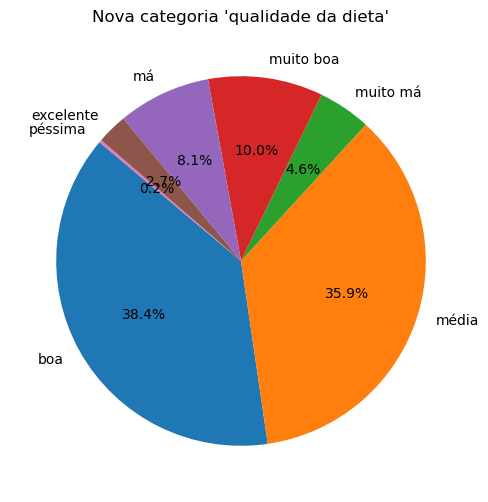

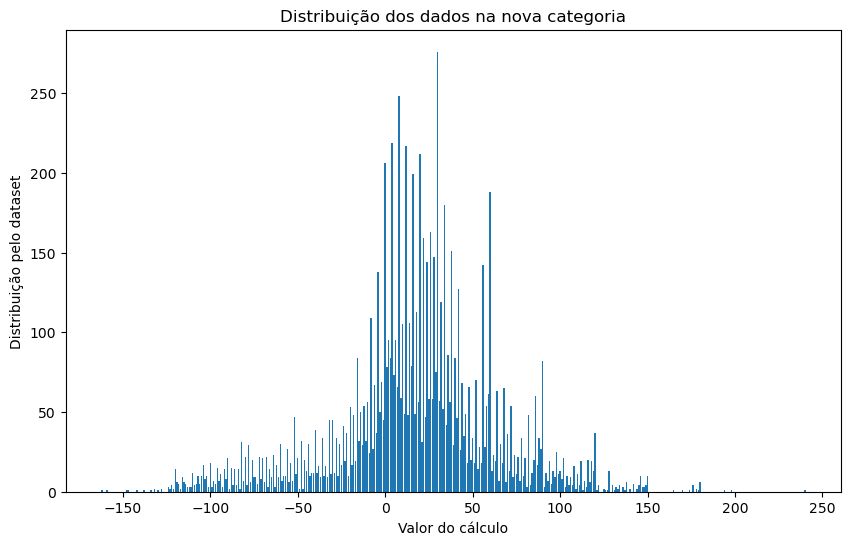

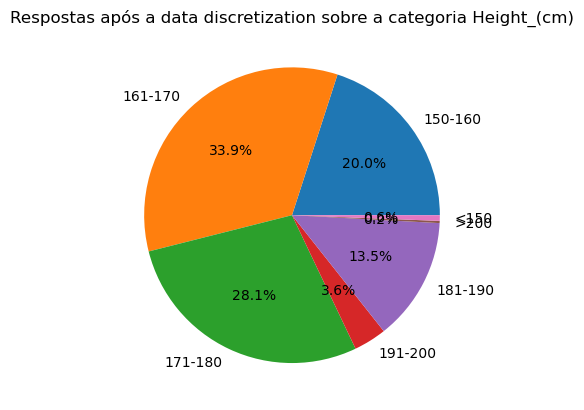

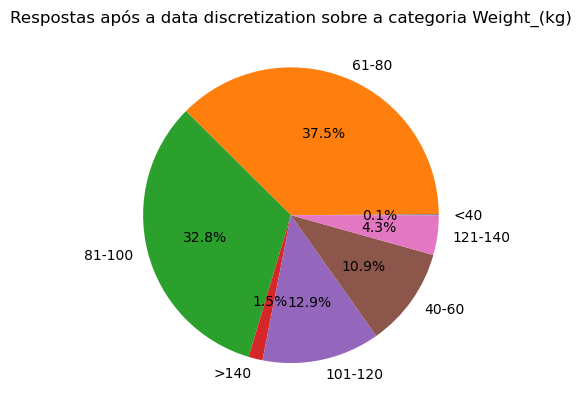

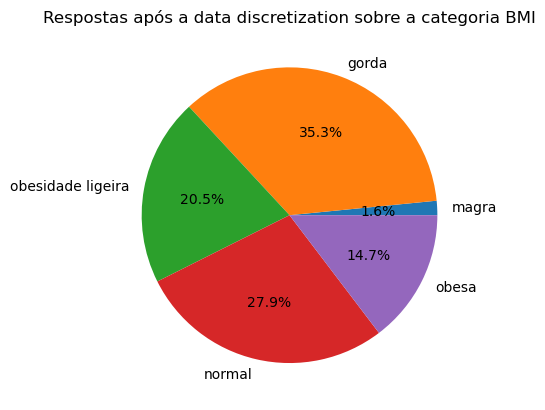

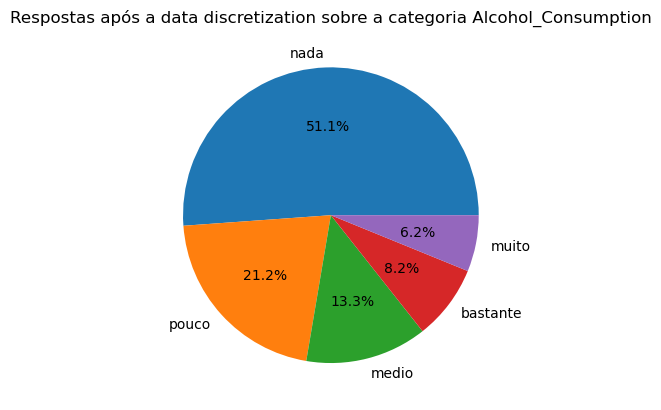

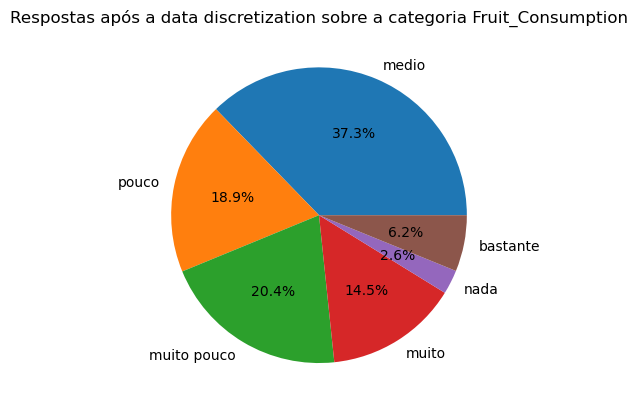

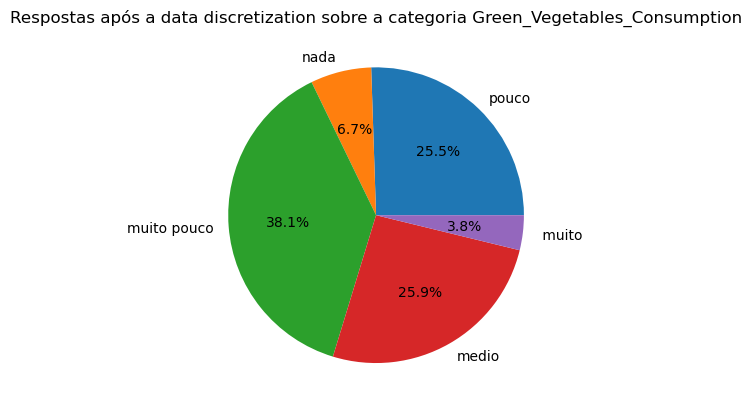

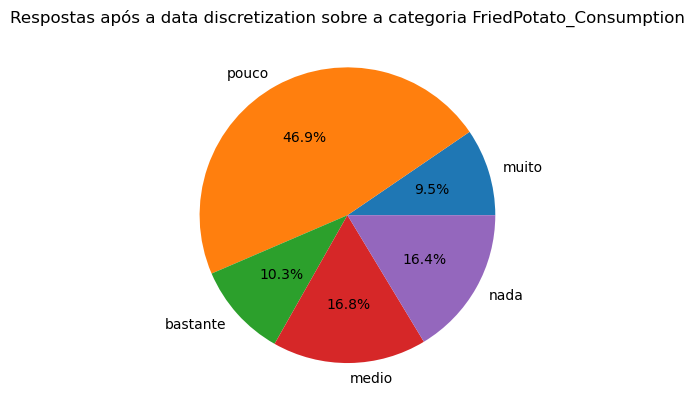

Dataset normal:
     General_Health                  Checkup Exercise Heart_Disease  \
0              Poor  Within the past 2 years       No            No   
1         Very Good     Within the past year       No           Yes   
2         Very Good     Within the past year      Yes            No   
3              Poor     Within the past year      Yes           Yes   
4              Good     Within the past year       No            No   
...             ...                      ...      ...           ...   
9260      Very Good     Within the past year      Yes            No   
9261           Good     Within the past year      Yes           Yes   
9262      Excellent  Within the past 5 years      Yes            No   
9263      Very Good     Within the past year      Yes            No   
9264           Good      5 or more years ago      Yes            No   

     Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
0             No           No         No       No       Yes 

In [39]:
# Data Reduction (Vicente) # Reduz o dataset
reduced_dataset = data_reduction(pandas_frame_dataset.copy(), True) # True para graficos para demonstracao

# Data Discretization (Vicente): Aplica discretização aos dados para categorizá-los
discretized_dataset = data_discretization(pandas_frame_dataset.copy(), True)  # True para graficos para demonstracao

# Data Normalization (Jonnas)
normalized_dataset = normalize_dataset(pandas_frame_dataset.copy()) # normalisa os valores

# TODO meter checks

print("Dataset normal:")
print(pandas_frame_dataset)
print("dataset normalizado:")
print(normalized_dataset)
print("Dataset com discretization:")
print(discretized_dataset)
print("Data reduction")
print(reduced_dataset)

### 4. Modeling

- 4.1. Select modeling techniques - os algoritmos que o stor pede no enunciado
- 4.2. Generate test design - dependendo do modelo ter diferentes valores de sets de train, teste e validation
- 4.3. Build model - implementar os modelos
- 4.4. Assess model - interpretar os resultados dos modelos e comprara-los e testalos entre eles para ver qual/quais são os melhores

### Supervised Learning

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import time as time

def decision_trees(dataset):
    # X são as features, y é o target
    X, y, _ = preprocess_dataset(dataset, debug=True)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Training...
    start_train_time = time.time()
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    end_train_time = time.time()

    # Testing...
    start_test_time = time.time()
    y_pred = dt_model.predict(X_test)
    end_test_time = time.time()

    training_time = end_train_time - start_train_time
    testing_time = end_test_time - start_test_time

    return y_test, y_pred, training_time, testing_time

def k_nn(dataset):
    # X são as features, y é o target
    X, y, _ = preprocess_dataset(dataset)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalizar features, importante para garantir que as features contribuem todas de forma igual para o cálculo da distância.
    #scaler = StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)

    # Training...
    start_train_time = time.time()
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    end_train_time = time.time()

    # Testing...
    start_test_time = time.time()
    y_pred = knn_model.predict(X_test)
    end_test_time = time.time()

    training_time = end_train_time - start_train_time
    testing_time = end_test_time - start_test_time

    return y_test, y_pred, training_time, testing_time

def multi_layer_perceptron(dataset):
    # X são as features, y é o target
    X, y, _ = preprocess_dataset(dataset)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalizar features
    #scaler = StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)

    # Training...
    start_train_time = time.time()
    mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2500, tol=1e-5, random_state=42)
    mlp_model.fit(X_train, y_train)
    end_train_time = time.time()

    # Testing...
    start_test_time = time.time()
    y_pred = mlp_model.predict(X_test)
    end_test_time = time.time()

    training_time = end_train_time - start_train_time
    testing_time = end_test_time - start_test_time

    return y_test, y_pred, training_time, testing_time

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def plot_metrics(y_test, y_pred, name,
                 training_time=0, testing_time=0, 
                 confusion_matrix_plot=True, 
                 times=True, 
                 metrics=True):
    """
    Retorna "accuracy", "precision", "recall" e "f1_score".
    Podes desativar qualquer um dos gráficos
    Escolhe o "name" para ttar na parte de cima dos graficos.
    """
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary")
    recall = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")

    # Initialize subplots
    n_plots = sum([confusion_matrix_plot, times, metrics])
    fig, axes = plt.subplots(1, n_plots, figsize=(6 * n_plots, 6))
    axes = axes if n_plots > 1 else [axes]

    # Confusion Matrix
    if confusion_matrix_plot:
        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0],
                    xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
        axes[0].set_title(f"Confusion Matrix {name}")
        axes[0].set_xlabel("Predicted")
        axes[0].set_ylabel("Actual")

    # Metrics Plot
    if metrics:
        metric_values = [accuracy, precision, recall, f1]
        metric_names = ["Accuracy", "Precision", "Recall", "F1-Score"]
        ax_idx = 1 if confusion_matrix_plot else 0
        axes[ax_idx].bar(metric_names, metric_values, color=["blue", "green", "orange", "purple"])
        axes[ax_idx].set_title(f"Metrics {name}")
        axes[ax_idx].set_ylim(0, 1)
        for i, v in enumerate(metric_values):
            axes[ax_idx].text(i, v + 0.02, f"{v:.2f}", ha="center")

    # Training and Testing Times
    if times:
        ax_idx = 2 if metrics and confusion_matrix_plot else 1 if metrics or confusion_matrix_plot else 0
        time_values = [training_time, testing_time]
        time_names = ["Training Time", "Testing Time"]
        
        # Plot the bar chart
        axes[ax_idx].bar(time_names, time_values, color=["red", "cyan"])
        axes[ax_idx].set_title(f"Training & Testing Times {name}")
        
        # Adjust y-axis limits to leave space for labels
        y_max = max(time_values) * 1.2  # Add 20% padding above the tallest bar
        axes[ax_idx].set_ylim(0, y_max)
        
        # Add text labels above bars
        for i, v in enumerate(time_values):
            axes[ax_idx].text(i, v + y_max * 0.05, f"{v:.4f}s", ha="center")  # Offset text slightly above the bar

    plt.tight_layout()
    plt.show()

    return {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
            "name": name,
        }

def compare_models(results):
    """
    Compara os modelos com base nas metricas, espera uma lista dos resultados da função plot_metrics com os nomes atribuidos, do género:
    [{'accuracy': 0.8330935251798561, 'precision': 0.1875, 'recall': 0.22727272727272727, 'f1_score': 0.2054794520547945, 'name': 'Decision Trees'}, {'accuracy': 0.8910071942446043, 'precision': 0.19047619047619047, 'recall': 0.045454545454545456, 'f1_score': 0.07339449541284404, 'name': 'K_nn'}]
    """
    # Extract metrics and names
    names = [result['name'] for result in results]
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    metric_values = {
        'Accuracy': [result['accuracy'] for result in results],
        'Precision': [result['precision'] for result in results],
        'Recall': [result['recall'] for result in results],
        'F1-Score': [result['f1_score'] for result in results],
    }

    # Plot the metrics comparison
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(metrics))  # Label locations for metrics
    width = 0.2  # Bar width

    for i, name in enumerate(names):
        # Shift each bar group by its index to avoid overlap
        ax.bar(x + i * width, [metric_values[metric][i] for metric in metrics], width, label=name)

    # Format the plot
    ax.set_ylabel('Metric Value')
    ax.set_title('Comparison of Model Metrics')
    ax.set_xticks(x + width * (len(names) - 1) / 2)  # Center group of bars around the ticks
    ax.set_xticklabels(metrics)
    ax.legend(title='Models')

    # Add text labels above bars
    for i, name in enumerate(names):
        for j, metric in enumerate(metrics):
            value = metric_values[metric][i]
            ax.text(x[j] + i * width, value + 0.02, f'{value:.2f}', ha='center')

    plt.tight_layout()
    plt.show()

Encoding for 'General_Health': {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very Good': 4}
Encoding for 'Checkup': {'5 or more years ago': 0, 'Never': 1, 'Within the past 2 years': 2, 'Within the past 5 years': 3, 'Within the past year': 4}
Encoding for 'Exercise': {'No': 0, 'Yes': 1}
Encoding for 'Heart_Disease': {'No': 0, 'Yes': 1}
Encoding for 'Skin_Cancer': {'No': 0, 'Yes': 1}
Encoding for 'Other_Cancer': {'No': 0, 'Yes': 1}
Encoding for 'Depression': {'No': 0, 'Yes': 1}
Encoding for 'Diabetes': {'No': 0, 'No, pre-diabetes or borderline diabetes': 1, 'Yes': 2, 'Yes, but female told only during pregnancy': 3}
Encoding for 'Arthritis': {'No': 0, 'Yes': 1}
Encoding for 'Sex': {'Female': 0, 'Male': 1}
Encoding for 'Age_Category': {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12}
Encoding for 'Smoking_History': {'No': 0, 'Yes': 1}


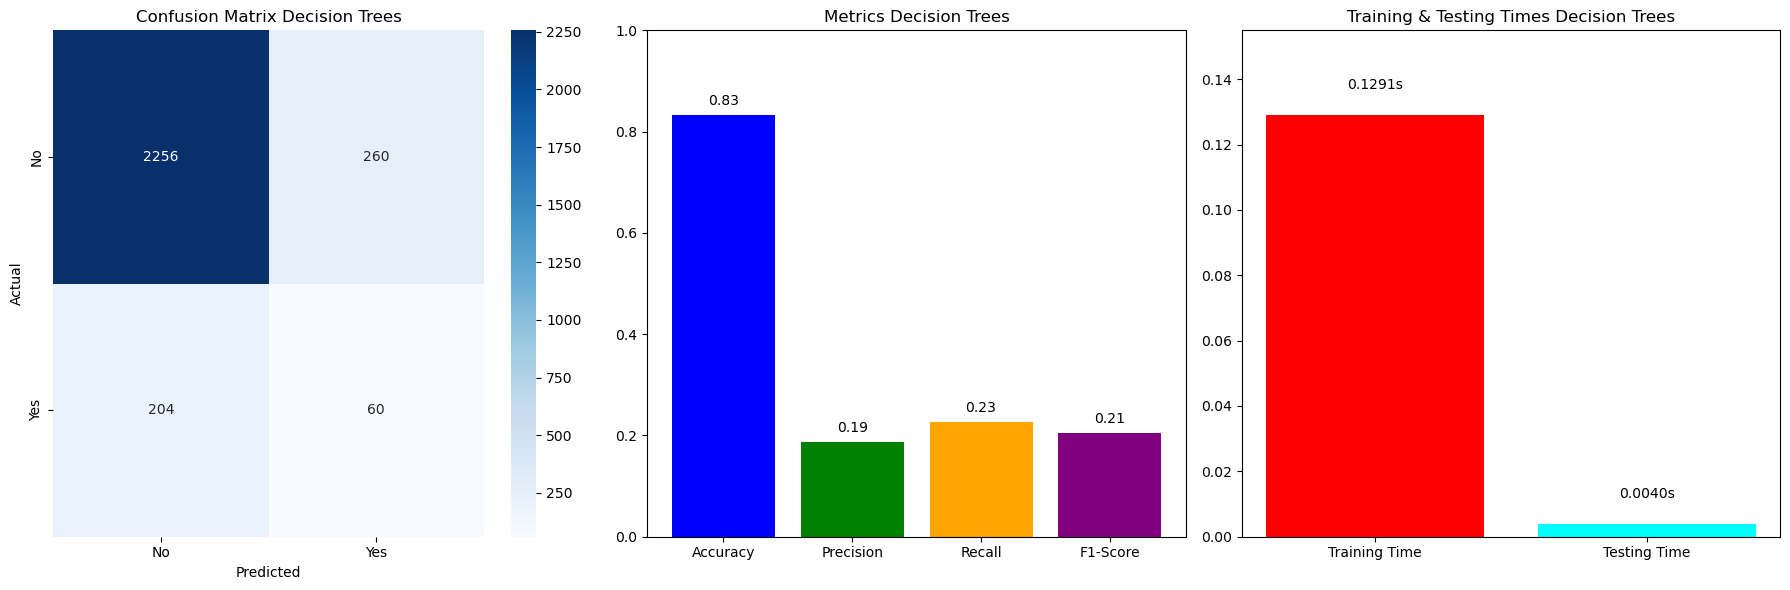

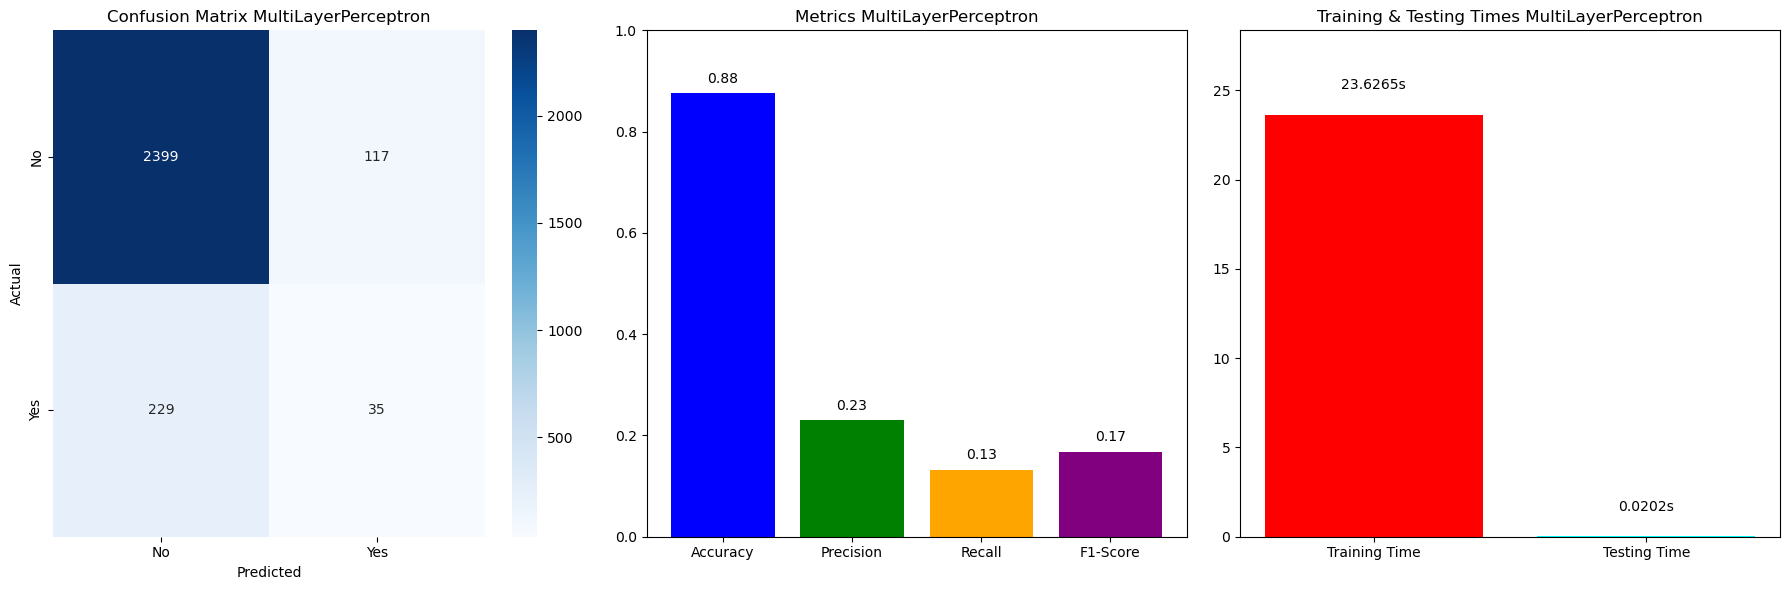

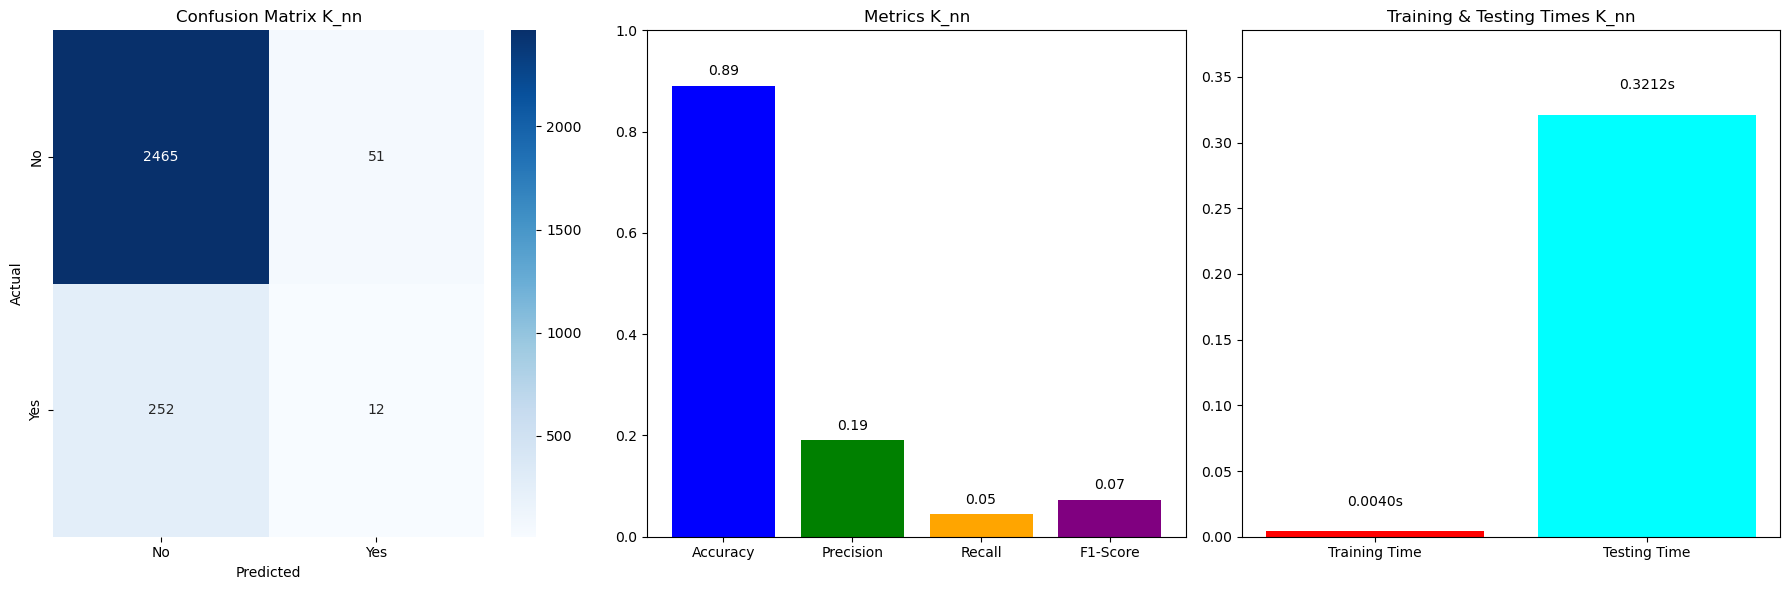

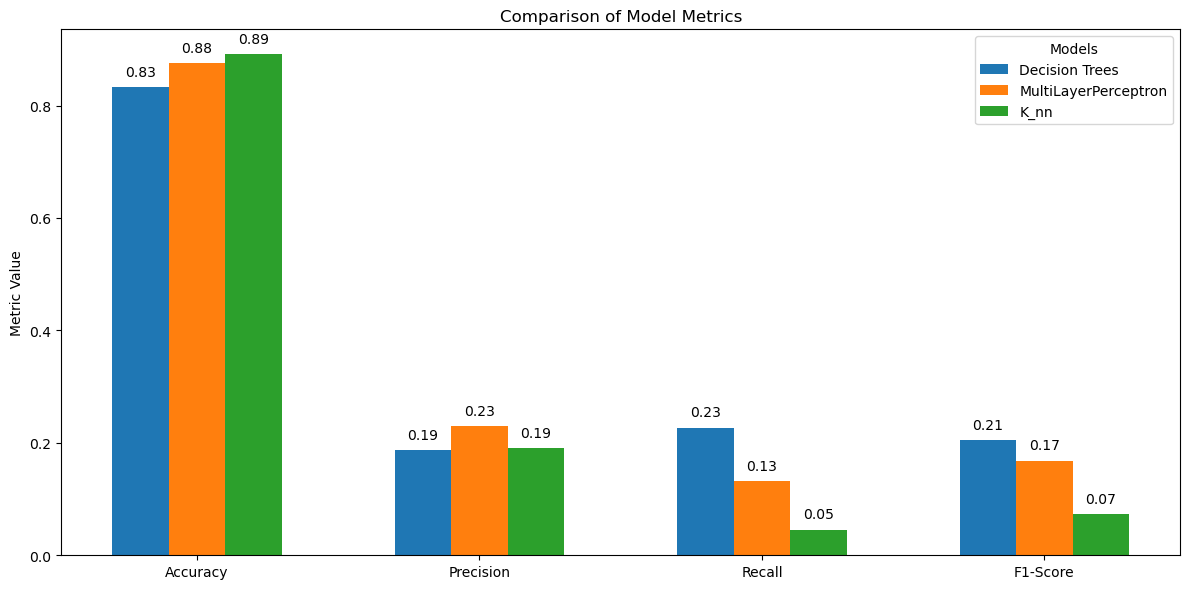

In [42]:
results_to_compare = []
normalized_dataset = normalize_dataset(pandas_frame_dataset.copy(), method='z-score') # method='min-max' or 'z-score', z-score gives better results

y_test, y_pred, training_time, testing_time = decision_trees(pandas_frame_dataset.copy())
metrics = plot_metrics(y_test, y_pred, 
             name="Decision Trees",
             training_time=training_time, testing_time=testing_time, 
             confusion_matrix_plot=True, 
             times=True, 
             metrics=True)
results_to_compare.append(metrics)

y_test, y_pred, training_time, testing_time = multi_layer_perceptron(normalized_dataset.copy()) # normalized dataset is important
metrics = plot_metrics(y_test, y_pred, 
             name="MultiLayerPerceptron",
             training_time=training_time, testing_time=testing_time, 
             confusion_matrix_plot=True, 
             times=True, 
             metrics=True)
results_to_compare.append(metrics)

y_test, y_pred, training_time, testing_time = k_nn(normalized_dataset.copy()) # normalized dataset is important
metrics = plot_metrics(y_test, y_pred, 
             name="K_nn",
             training_time=training_time, testing_time=testing_time, 
             confusion_matrix_plot=True, 
             times=True, 
             metrics=True)
results_to_compare.append(metrics)

# Comparar as metricas dos modelos:
compare_models(results_to_compare)

#### Unsupervised Learning

In [43]:
										#-----------------------------#
										#         4. Modeling         #
										#-----------------------------#


### 5. Evaluation

- 5.1. Evaluate results - ver que modelos devemos usar e quais melhor correspondem com o business criteria
- 5.2. Review process - fazer uma revisão critica ao trabalho feito
- 5.3. Determine next steps - determnar se esta bom para o deploymente, se é preciso melhorar um pouco mais ou expandir o projeto // ns bem como fazer isto neste trabalho

In [44]:
										#-----------------------------#
										#        5. Evaluation        #
										#-----------------------------#

